# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:  Zhen Han 

Last Name: Si

Student ID: 999671870

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [127]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

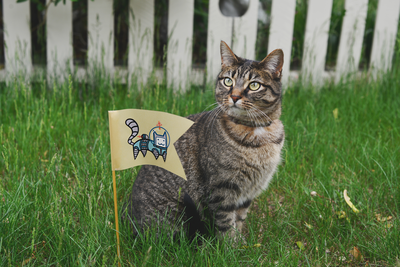

In [4]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [5]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [6]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

<strong style="color:#F00">
Grade: 5/10

Notes: What does each dimension represent?
</strong>

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [128]:
#these are the codes given:
import numpy as np
from PIL import Image
cat_img = Image.open("cat.png")
#change the image into matrix:
cat = np.array(cat_img)
#get the dimension of the matrix:
np.shape(cat)

(267, 400, 3)

<strong style="color:#F00">
Grade: 3/10

Notes: Need to copy temporary variable
</strong>

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

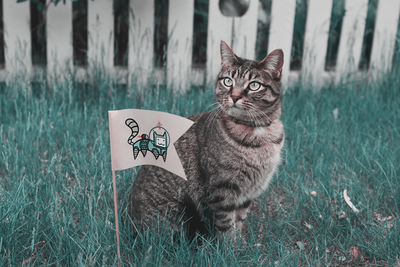

In [129]:
#copy the image matrix and call it cat_clone:
cat_clone=cat.copy()
#swap the green and blue color:
B=cat_clone[:,:,2]
cat_clone[:,:,2]=cat_clone[:,:,1]
cat_clone[:,:,1]=B
#the code given:
def as_image(x):
    return Image.fromarray(np.uint8(x))
#use the given function to display the image after swap:
as_image(cat_clone)

<strong style="color:#F00">
Grade: 10/10

Notes:
</strong>

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

#Method .copy() is used to allocate a new area in the memory space for the object cat_clone. 
#If dont's use .copy(), cat array and cat_clone would point to the same memory block, so that any operation on cat_clone would also modify cat array. We hope to keep the clone of cat.png in memory, so .copy() is necessary here. 
#Otherwise we have to read cat.png again.

<strong style="color:#F00">
Grade: 10/10

Notes:
</strong>

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

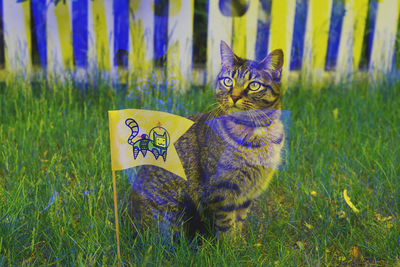

In [130]:
#copy the image matrix again:
cat_clone2=cat.copy()
#flip the blue color: 
cat_clone2[:,:,2]=np.fliplr(cat_clone2[:,:,2])
#display the new image: 
as_image(cat_clone2)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [131]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.



<strong style="color:#F00">
Grade: 18/20

Notes: N5. N1
</strong>

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [132]:
#the first function which takes  a matrix x and returns its principal component matrix  XVq and basis matrix VqT: 
def PCA(X,q):
    #use the given code to get u,d,v
    u,d,v=np.linalg.svd(X)
    #select the range of q, form the v_qt we want, or to say, select the first number of rows we want:
    V_qt=v[0:q,:]
    #get xv_q by the formula given:
    XV_q=np.dot(X,np.transpose(V_qt))
    #return the value:
    return XV_q,V_qt

In [133]:
#A function that takes a principal component matrix XVq and basis matrixVqT and returns an approximation x of original matrix:
def PCA_rev(XVq,Vqt):
    #just matrix times these two together
    return np.dot(XVq,Vqt)

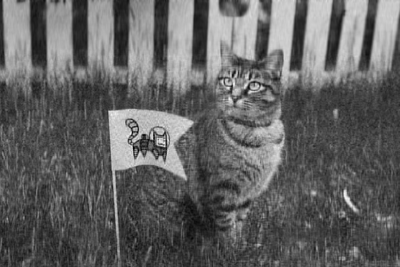

In [134]:
#let the image only contains red color:
x=cat_clone[:,:,0]
#output xvq and vqt for q=50:
XVq,Vqt=PCA(x,50)
#get the approximation of x when q=50:
X50=PCA_rev(XVq,Vqt)
#display the image:
as_image(X50)

In [135]:
#check the data type,used for later comparison:
X50.dtype

dtype('float64')

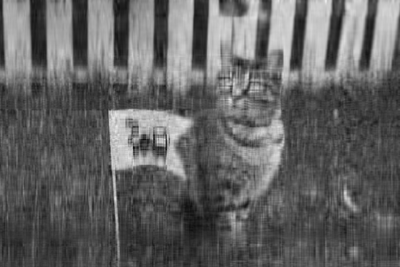

In [136]:
#same method check q=20:
x=cat_clone[:,:,0]
XVq,Vqt=PCA(x,20)
X=PCA_rev(XVq,Vqt)
as_image(X)

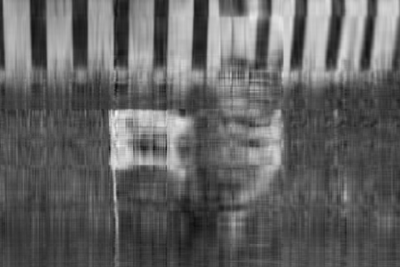

In [137]:
#same method test q=10, we discover its hard to define it as a cat:
x=cat_clone[:,:,0]
XVq10,Vqt10=PCA(x,10)
X10=PCA_rev(XVq10,Vqt10)
as_image(X10)

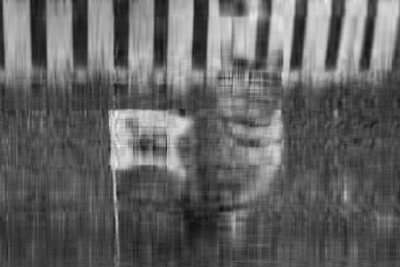

In [138]:
#test for 12, i think 12 is the smallest number for which it still can be seen as a cat:   
x=cat_clone[:,:,0]
XVq,Vqt=PCA(x,12)
X12=PCA_rev(XVq,Vqt)
as_image(X12)

<strong style="color:#F00">
Grade: 10/10

Notes:
</strong>

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [139]:
#we need to change it to the same data type as PCA, so we can compare:
cat[:,:,0].astype(dtype=np.uint64).nbytes

854400

In [140]:
#the bytes needed for q=10
XVq10.nbytes+Vqt10.nbytes

53360

In [141]:
53360/854400
#only 6.25% of the original size.

0.062453183520599254

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [14]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [15]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [16]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

<strong style="color:#F00">
Grade: 18/20

Notes: N5
</strong>

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [142]:
#A function that returns the FFT coefficients and dimensions of a matrix X.
def FFT(X,q):
    #code given to get x_coef:
    x_coef=np.fft.rfft2(X)
    #to make elements after first q rows and q cols to be 0:
    x_coef[q:,q:]=0.
    #return x_coef and original x shape:
    return x_coef,X.shape

In [143]:
#A function that takes FFT coefficients and dimensions and returns an approximation X̂ for the original matrix.
def FFT_rev(x_coef,shape):
    return np.fft.irfft2(x_coef,shape)

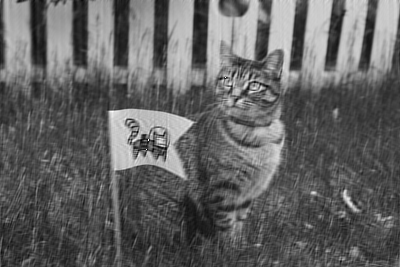

In [144]:
#get the only red channel image matrix 
x=cat_clone[:,:,0]
#get the coef and shape for q=50
x_coef,shape=FFT(x,50)
#get the estimation of x when q=50 
X=FFT_rev(x_coef,shape)
#display the iamge:
as_image(X)

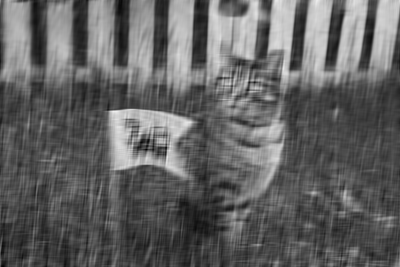

In [145]:
#same method display q=20
x=cat_clone[:,:,0]
x_coef,shape=FFT(x,20)
X=FFT_rev(x_coef,shape)
as_image(X)

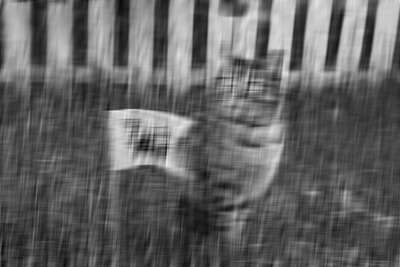

In [146]:
#same method, q=15:
x=cat_clone[:,:,0]
x_coef,shape=FFT(x,15)
X=FFT_rev(x_coef,shape)
as_image(X)

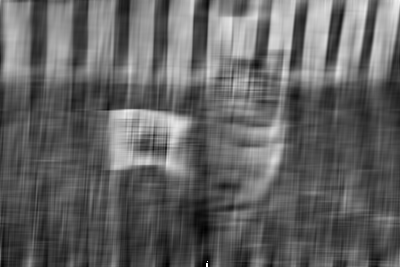

In [147]:
#same method q=10:
x=cat_clone[:,:,0]
x_coef,shape=FFT(x,10)
X=FFT_rev(x_coef,shape)
as_image(X)

In [ ]:
#we find out we cannot recoginize it as a cat at q below 15.

In [90]:
#check the data type for later comparison:
X.dtype

dtype('float64')

<strong style="color:#F00">
Grade: 7/10

Notes: N3. FFT better for file compression -- we do not need to store the zeros
</strong>

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [148]:
#write the function to output both the image and bytes:
def test(x,d):
    #x_1 is the estimation using svd:
    XVq,Vqt=PCA(x,d)
    X_1=PCA_rev(XVq,Vqt)
    #X_2 is the estimation using fft
    x_coef,shape=FFT(x,d)
    X_2=FFT_rev(x_coef,shape)
    #to put them together into one display image:
    X=np.concatenate((X_1,X_2),1)
    #print the bytes needed:
    print('PCA costs %d bytes'%(XVq.nbytes+Vqt.nbytes))
    print('FFT costs %d bytes'%(x_coef[0:d,0:d].nbytes+np.array(shape).nbytes))
    #display the image:
    X=as_image(X)
    X.save('exe3_'+str(d)+'.bmp')
    return X

In [149]:
test(cat_clone[:,:,0],50).show()
#results when q=50
#The image will display when you run this cell!!!!! 

PCA costs 266800 bytes
FFT costs 40016 bytes


In [63]:
test(cat_clone[:,:,0],40).show()
#results when q=40
#The image will display when you run this cell!!!!! 

PCA costs 213440 bytes
FFT costs 25616 bytes


In [64]:
test(cat_clone[:,:,0],30).show()
#results when q=30
#The image will display when you run this cell!!!!! 

PCA costs 160080 bytes
FFT costs 14416 bytes


In [87]:
test(cat_clone[:,:,0],20).show()
#results when q=20
#The image will display when you run this cell!!!!! 

PCA costs 106720 bytes
FFT costs 6416 bytes


In [66]:
test(cat_clone[:,:,0],10).show()
#results when q=10
#The image will display when you run this cell!!!!! 

PCA costs 53360 bytes
FFT costs 1616 bytes


##SVD works better for the decomposition task. As we can see above, with the same term kept SVD decomposition result in a sharper image. And when the number of term we kept goes down, the cost of SVD goes down linearly while the FFT kept invariant. Because FFT always uses a coefficient matrix that has the same size of the original matrix 'X', bytes cost by FFT would not change according to the number of terms been kept. But for SVD, when 'q' goes down $XV_q$ or $V_q^T$ also have a smaller size, which save the cost of bytes for SVD. Consider the reasion above, I think SVD works better on both tasks of dimension reduction and file compression.